## Observations and Insights 

In [222]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random                # To Remove Later

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Check the header of each file
#250 Records
#mouse_metadata.head()
#1,893 Records
#study_results.head()

# Combine the data into a single dataset
FullStudyDataset_df=pd.merge(mouse_metadata, study_results,how="inner", left_on='Mouse ID', right_on='Mouse ID')

# Review Count Records
#FullStudyDataset_df.count()

# Display the data table for preview
FullStudyDataset_df.head(1893)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [223]:
# Checking the number of mice.
DistinctMouseList= FullStudyDataset_df['Mouse ID'].unique()
#print(DistinctMouseList)

#Find count of Mice
CountOfMice=len(DistinctMouseList)
print(F"Total Count of Mice in Study: {CountOfMice}.")

Total Count of Mice in Study: 249.


In [224]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MouseTimepointComboList_df= FullStudyDataset_df.copy()

#Drop all non-needed columns
del MouseTimepointComboList_df['Drug Regimen']
del MouseTimepointComboList_df['Sex']
del MouseTimepointComboList_df['Age_months']
del MouseTimepointComboList_df['Weight (g)']
del MouseTimepointComboList_df['Tumor Volume (mm3)']
del MouseTimepointComboList_df['Metastatic Sites']

#Re-define datatype needed for later combo operation
MouseTimepointComboList_df['Timepoint'] = MouseTimepointComboList_df['Timepoint'].apply(str)

#Concatenate the values for distinct comparison
MouseTimepointComboList_df['ComboIDTime']= (MouseTimepointComboList_df['Mouse ID']+'|'+MouseTimepointComboList_df['Timepoint'])


#Chekckscript
MouseTimepointComboList_df.head(1893)

#Checkscript
#FullStudyDataset_df.head()

#Checkscript
#print(DistinctMouseList)

,Mouse ID,Timepoint,ComboIDTime
0,k403,0,k403|0
1,k403,5,k403|5
2,k403,10,k403|10
3,k403,15,k403|15
4,k403,20,k403|20
...,...,...,...
1888,z969,25,z969|25
1889,z969,30,z969|30
1890,z969,35,z969|35
1891,z969,40,z969|40


In [225]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicatedComboList_df=MouseTimepointComboList_df[MouseTimepointComboList_df.duplicated(keep=False)]

#Full List of Duplicated Mouse ID/Timepoint Combos 
DuplicatedComboList_df.head(10)


,Mouse ID,Timepoint,ComboIDTime
908,g989,0,g989|0
909,g989,0,g989|0
910,g989,5,g989|5
911,g989,5,g989|5
912,g989,10,g989|10
913,g989,10,g989|10
914,g989,15,g989|15
915,g989,15,g989|15
916,g989,20,g989|20
917,g989,20,g989|20


In [226]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Pull back a full set of data for cleanup. 
CleanedFullStudyDataset_df= FullStudyDataset_df.copy()

#Checkscipt
#CleanedFullStudyDataset_df.head(1893)


#Identify the single mouse to be removed due to duplicated data. 
MouseToBeRemoved = DuplicatedComboList_df.iloc[1][0]
print(F"Mouse to be Removed from Study: {MouseToBeRemoved}. Records to be removed are as follows:")

#Find all records of the mouse that needs to be removed *Both duplicated records and single records
RecordsToBeRemoved_df= (FullStudyDataset_df.loc[FullStudyDataset_df['Mouse ID'] == MouseToBeRemoved, :])
#RecordsToBeRemoved_df.head(13)

#New_DF=(CleanedFullStudyDataset_df.iloc[RecordsToBeRemoved_df['Mouse ID'] == MouseToBeRemoved ,:])
#New_DF.head()

#Drop records to be removed for duplicated MouseID
CleanedFullStudyDataset_df = CleanedFullStudyDataset_df.drop(CleanedFullStudyDataset_df.index[[908,909,910,911,912,913,914,915,916,917,918,919,920]])

#Checkscipt
CleanedFullStudyDataset_df.head(1880)


Mouse to be Removed from Study: g989. Records to be removed are as follows:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [227]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
CleanedDistinctMouseList= CleanedFullStudyDataset_df['Mouse ID'].unique()
#print(CleanedDistinctMouseList)


#Find count of Cleaned Mice
CleanedCountOfMice=len(CleanedDistinctMouseList)
#print(CleanedCountOfMice)
print(F"The count of cleaned mice left in the Study: {CleanedCountOfMice}.")

The count of cleaned mice left in the Study: 248.


## Summary Statistics

In [228]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
CleanedTumorVolume_df= CleanedFullStudyDataset_df.copy()

#Cleaned#umorVolume_df.head()

del CleanedTumorVolume_df['Mouse ID']
del CleanedTumorVolume_df['Sex']
del CleanedTumorVolume_df['Age_months']
del CleanedTumorVolume_df['Weight (g)']
del CleanedTumorVolume_df['Timepoint']
del CleanedTumorVolume_df['Metastatic Sites']

#Tumor Volume Information
#CleanedTumorVolume_df.head(1880)

#Mean Tumor Volume by Drug Regimen
TumorVolumeAverage_df = CleanedTumorVolume_df.groupby(['Drug Regimen']).mean()
TumorVolumeMedian_df = CleanedTumorVolume_df.groupby(['Drug Regimen']).median()
TumorVolumeVariance_df = CleanedTumorVolume_df.groupby(['Drug Regimen']).var()
TumorVolumeStdDev_df = CleanedTumorVolume_df.groupby(['Drug Regimen']).std()
TumorVolumeSEM_df = CleanedTumorVolume_df.groupby(['Drug Regimen']).sem()

# Rename Columns
TumorVolumeAverage_df = TumorVolumeAverage_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Mean'})
TumorVolumeMedian_df = TumorVolumeMedian_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Median'})
TumorVolumeVariance_df = TumorVolumeVariance_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})
TumorVolumeStdDev_df = TumorVolumeStdDev_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std Dev'})                                                             
TumorVolumeSEM_df = TumorVolumeSEM_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume SEM'})



#Display to Screen
print(F"The TumorVolumeAverage values are: {TumorVolumeAverage_df}")
print("")
print(F"TumorVolumeMedian values are: {TumorVolumeMedian_df}")
print("")
print(F"TumorVolumeVariance values are: {TumorVolumeVariance_df}")
print("")
print(F"TumorVolumeStdDev values are: {TumorVolumeStdDev_df}")
print("")
print(F"TumorVolumeSEM values are: {TumorVolumeSEM_df}")

The TumorVolumeAverage values are:               Tumor Volume Mean
Drug Regimen                   
Capomulin             40.675741
Ceftamin              52.591172
Infubinol             52.884795
Ketapril              55.235638
Naftisol              54.331565
Placebo               54.033581
Propriva              52.320930
Ramicane              40.216745
Stelasyn              54.233149
Zoniferol             53.236507

TumorVolumeMedian values are:               Tumor Volume Median
Drug Regimen                     
Capomulin               41.557809
Ceftamin                51.776157
Infubinol               51.820584
Ketapril                53.698743
Naftisol                52.509285
Placebo                 52.288934
Propriva                50.446266
Ramicane                40.673236
Stelasyn                52.431737
Zoniferol               51.818479

TumorVolumeVariance values are:               Tumor Volume Variance
Drug Regimen                       
Capomulin                 24.947764
C

In [229]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#TumorVolumeAverage_df 
#TumorVolumeMedian_df
#TumorVolumeVariance_df
#TumorVolumeStdDev_df
#TumorVolumeSEM_df


# Combine the data into a single dataset
Tv2_df=pd.merge(TumorVolumeAverage_df, TumorVolumeMedian_df,how="inner", left_on='Drug Regimen', right_on='Drug Regimen')
#Tv2_df.head()
Tv3_df=pd.merge(Tv2_df, TumorVolumeVariance_df,how="inner", left_on='Drug Regimen', right_on='Drug Regimen')
#Tv3_df.head()
Tv4_df=pd.merge(Tv3_df, TumorVolumeStdDev_df,how="inner", left_on='Drug Regimen', right_on='Drug Regimen')
#Tv4_df.head()
TumorVolumeFinalSummary_df=pd.merge(Tv4_df, TumorVolumeSEM_df,how="inner", left_on='Drug Regimen', right_on='Drug Regimen')
TumorVolumeFinalSummary_df.head(10)


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

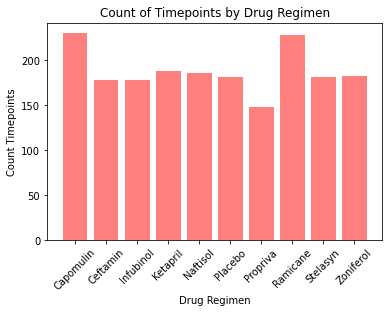

In [230]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Copy of Data Arrays for plotting
TimepointDrugRegimen_df=CleanedFullStudyDataset_df.copy()
#TimepointGroupedByDrugRegimen_df.head()

#Remove extraneous columns
del TimepointDrugRegimen_df['Mouse ID']
del TimepointDrugRegimen_df['Sex']
del TimepointDrugRegimen_df['Age_months']
del TimepointDrugRegimen_df['Weight (g)']
del TimepointDrugRegimen_df['Tumor Volume (mm3)']
del TimepointDrugRegimen_df['Metastatic Sites']

#Scaled down Dataframe
#TimepointDrugRegimen_df.head()

#Find Timepoints by Drug Regimen
TimepointGroupedByDrugRegimen_df = TimepointDrugRegimen_df.groupby(['Drug Regimen']).count()
TimepointGroupedByDrugRegimen_df.reset_index(inplace=True)

#Checkscript
#TimepointGroupedByDrugRegimen_df.head(10)

#Define Variables for use in plotting below
DrugRegimenCountTimepoints = TimepointGroupedByDrugRegimen_df['Timepoint']  
x_axis = np.arange(len(TimepointGroupedByDrugRegimen_df))   

# Matplotlib bar chart
plt.bar(x_axis, DrugRegimenCountTimepoints, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, TimepointGroupedByDrugRegimen_df['Drug Regimen'],rotation = 45)
plt.title("Count of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count Timepoints");


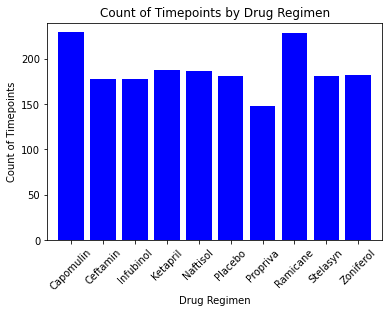

In [231]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Set Variables for Plotting below
DrugRegimenList = TimepointGroupedByDrugRegimen_df['Drug Regimen'] 
DrugRegimenCountTimeplots2 = TimepointGroupedByDrugRegimen_df['Timepoint']          
x_axis = np.arange(len(TimepointGroupedByDrugRegimen_df))

# Create a bar chart based upon the above data
plt.bar(x_axis, DrugRegimenCountTimeplots2, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, TimepointGroupedByDrugRegimen_df['Drug Regimen'],rotation = 45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(DrugRegimenCountTimeplots2)+10)
plt.title("Count of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints");

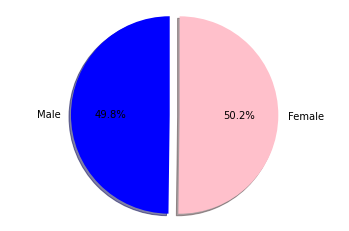

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Copy of Data Arrays for plotting
MouseGender_df=mouse_metadata.copy()
#MouseGender_df.head()


#Remove extraneous columns
del MouseGender_df['Mouse ID']
del MouseGender_df['Drug Regimen']
del MouseGender_df['Age_months']
del MouseGender_df['Weight (g)']

#Reset Index
MouseGender_df.reset_index(inplace=True)

#Checkscript
#MouseGender_df.head()

#Checkscript
#MouseGender_df['Sex']

#New Dtaaframe for Group By
MouseCountGroupByGender_df = MouseGender_df.groupby(['Sex']).count()
#Reset Index
MouseCountGroupByGender_df.reset_index(inplace=True)
#Rename Column
MouseCountGroupByGender_df = MouseCountGroupByGender_df.rename(columns={'index': 'Count'})

#Checkscript
#MouseCountGroupByGender_df.head()
#MouseCountGroupByGender_df['Count'].head()

# Set Labels/Values
labels = (MouseGender_df['Sex'].unique())
sizes = MouseCountGroupByGender_df['Count']                       
colors = ["blue", "pink"]
explode = (0.1, 0)
#Generate Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal");


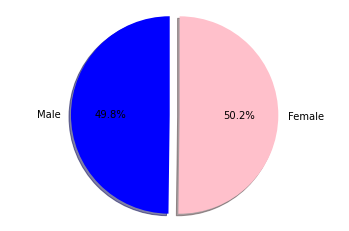

In [233]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender = (MouseGender_df['Sex'].unique())
Percentage = MouseCountGroupByGender_df['Count']
colors = ["blue","pink"]
explode = (0.1,0)

# Create Chart Based on Variables/Params above
plt.pie(Percentage, explode=explode, labels=Gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [262]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Copy of Data Arrays for plotting
FourDrugRegimen_df=CleanedFullStudyDataset_df.copy()
#FourDrugRegimen_df.head()

#Declaring the list of drug regimens
FourDrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
  
# selecting rows based on column value found in list
FourDrugRegimen_df = FourDrugRegimen_df[FourDrugRegimen_df['Drug Regimen'].isin(FourDrugs)]
#FourDrugRegimen_df.head(814)


#Remove extraneous columns
del FourDrugRegimen_df['Sex']
del FourDrugRegimen_df['Age_months']
del FourDrugRegimen_df['Weight (g)']
del FourDrugRegimen_df['Metastatic Sites']

#Checkscript
FourDrugRegimen_df.head(814)

# Start by getting the last (greatest) timepoint for each mouse
FourDrugRegimen_df['MaxTimepoint'] = FourDrugRegimen_df.groupby(['Mouse ID'])['Timepoint'].transform(max) 


#Build out Dataframe with MouseID, Max Timepoint and Max Tumor Volume
FourDrugRegimenGrouped_df=FourDrugRegimen_df.groupby('Mouse ID').agg(
            MaxTimepoint_mean = ('MaxTimepoint', 'mean'),
             MaxTumorVolume_range = ('Tumor Volume (mm3)', lambda x: x.max()))

#Checkscript
#FourDrugRegimenGrouped_df.head(100)

# Rename Columns
FourDrugRegimenGrouped_df = FourDrugRegimenGrouped_df.rename(columns={'MaxTimepoint_mean': 'MaxTimepoint'})
FourDrugRegimenGrouped_df = FourDrugRegimenGrouped_df.rename(columns={'MaxTumorVolume_range': 'Tumor Volume at max Time(mm3)'})

#Remove extraneous column
del FourDrugRegimenGrouped_df['MaxTimepoint']


#Reset Index
FourDrugRegimenGrouped_df.reset_index(inplace=True)

#Checkscript
#FourDrugRegimenGrouped_df.head(100)
#print(FourDrugRegimenGrouped_df)


#Checkscript
FourDrugRegimen_df.loc[FourDrugRegimen_df['Drug Regimen'] == 'Capomulin', :]

# Testing Max Values to ensure worked properly
#a203/67.973419
#a251/65.525743
#a444/45.000000
#FourDrugRegimen_df.loc[FourDrugRegimen_df['Mouse ID'] == 'a444', :]

s185


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),MaxTimepoint
10,s185,Capomulin,0,45.000000,45
11,s185,Capomulin,5,43.878496,45
12,s185,Capomulin,10,37.614948,45
13,s185,Capomulin,15,38.177232,45
14,s185,Capomulin,20,36.866876,45
...,...,...,...,...,...
440,i557,Capomulin,45,47.685963,45
1452,r157,Capomulin,0,45.000000,15
1453,r157,Capomulin,5,45.597064,15
1454,r157,Capomulin,10,46.059608,15


In [256]:
# Put treatments into a list for for loop (and later for plot labels)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
print(st.normaltest(FourDrugRegimenGrouped_df["Tumor Volume at max Time(mm3)"].sample(100)))

# Determine if there are any potential outliers in the average occupancy in California
quartiles = FourDrugRegimenGrouped_df['Tumor Volume at max Time(mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("")
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
print("")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_TumorVolume = FourDrugRegimenGrouped_df.loc[(FourDrugRegimenGrouped_df["Tumor Volume at max Time(mm3)"] < lower_bound) | (FourDrugRegimenGrouped_df["Tumor Volume at max Time(mm3)"] > upper_bound)]
outlier_TumorVolume;



NormaltestResult(statistic=18.463374057425217, pvalue=9.788795705489666e-05)

The lower quartile of Tumor Volume is: 45.5098442875
The upper quartile of Tumor Volume is: 59.930261755
The interquartile range of Tumor Volume is: 14.420417467499995
The the median of Tumor Volume is: 46.860058175 

Values below 23.87921808625001 could be outliers.
Values above 81.56088795624999 could be outliers.


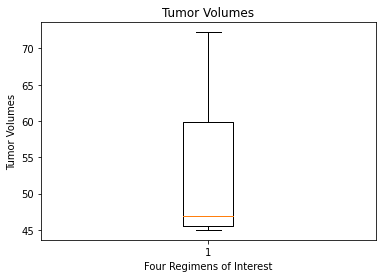

In [257]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Generate Boxplot
TumorVolume = FourDrugRegimenGrouped_df["Tumor Volume at max Time(mm3)"]  
fig1, ax1  = plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Tumor Volumes')
ax1.set_xlabel('Four Regimens of Interest')
ax1.boxplot(TumorVolume)
plt.show()

## Line and Scatter Plots

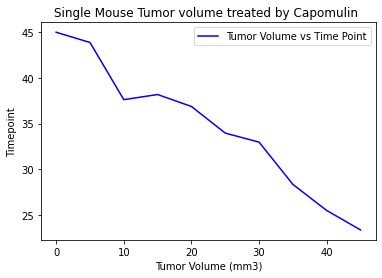

In [283]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

SingleMouseCapomulin_df=FourDrugRegimen_df.loc[FourDrugRegimen_df['Mouse ID'] == 's185', :]
#SingleMouseCapomulin_df.head(20)

#print(SingleMouseCapomulin_df['Timepoint'])
#print(SingleMouseCapomulin_df['Tumor Volume (mm3)'])

xaxis=[]
yaxis=[]

# Set x axis and variables
xaxis=SingleMouseCapomulin_df['Timepoint']
yaxis=SingleMouseCapomulin_df['Tumor Volume (mm3)']

# plot Line
plt.plot(xaxis, yaxis, color='blue', label="Tumor Volume vs Time Point")

#Other attributes
plt.legend(loc="upper right")
plt.title("Single Mouse Tumor volume treated by Capomulin ")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

# Show line Graph
plt.show();

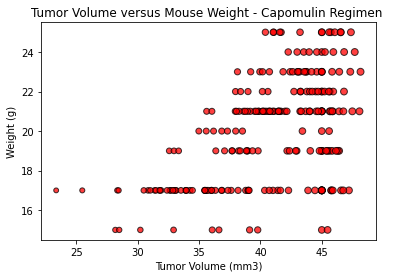

In [293]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Copy of Data Arrays for plotting
CapomulinDrugRegimen_df=CleanedFullStudyDataset_df.copy()
CapomulinDrugRegimen_df.head(1880)


#Declaring the list of drug regimens
DrugRegimen = ['Capomulin']
 
# selecting rows based on column value found in list
CapomulinDrugRegimen_df = CapomulinDrugRegimen_df[CapomulinDrugRegimen_df['Drug Regimen'].isin(DrugRegimen)]
CapomulinDrugRegimen_df.head(230)

xaxis=[]
yaxis=[]

# Set x axis and variables
xaxis=CapomulinDrugRegimen_df['Tumor Volume (mm3)']
yaxis=CapomulinDrugRegimen_df['Weight (g)']


# Generate Scatter plot
plt.scatter(xaxis, yaxis, marker="o", facecolors="red", edgecolors="black",
            s=xaxis, alpha=0.75)

plt.title("Tumor Volume versus Mouse Weight - Capomulin Regimen ")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

# Generate plot to screen
plt.show();

## Correlation and Regression

In [302]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
CapomulinDrugRegimen_df.head(230)


# Generate correlation coefficient between Mouse Weight and Tumor Volume
MouseWeight = CapomulinDrugRegimen_df.iloc[:,4]
TumorVolume = CapomulinDrugRegimen_df.iloc[:,6]
#print(MouseWeight)
#print(TumorVolume)

correlation = st.pearsonr(MouseWeight,TumorVolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53
